<a href="https://colab.research.google.com/github/moraes-ederson/Curso_DominandoDS_Flai/blob/main/3_aula_anotacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Data**

## Importação dos dados

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/insurance.csv')

In [ ]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados.shape

(1338, 7)

## EDA Básica usando sweetviz

In [ ]:
# instalando sweetviz
!pip install sweetviz

     |████████████████████████████████| 15.1MB 275kB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz

In [ ]:
eda = sweetviz.analyze([dados, "Seguro Saúde"], target_feat="charges")
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Algum pré-processamento interessante antes de prosseguir:

*   Transformar a variável smoker em 0 (não) ou 1 (sim)
*   Colocar a variável resposta na escala para cada mil dolares


In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

**Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker.**

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


## Gráficos pertinentes

In [ ]:
import seaborn as sns

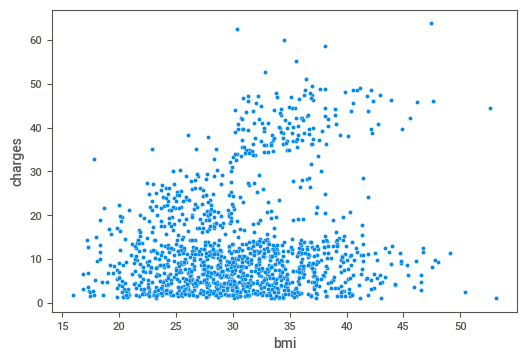

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

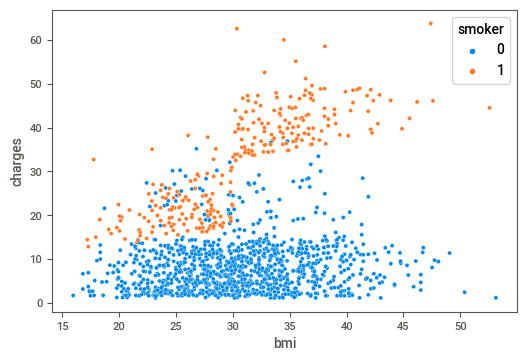

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

## Cenário 1: considerando apenas a variável **bmi**.

Utilizando *bmi* para prever *charges*.

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 

In [ ]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Holdout
# Separando em dados teste e treinamento 

from sklearn.model_selection import train_test_split 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


In [ ]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yteste

515     11.362755
907      7.633721
409      4.074454
78       2.755021
721     11.264541
          ...    
611      6.571544
1319     7.201701
75      11.356661
375     18.033968
311      1.737376
Name: charges, Length: 335, dtype: float64

In [ ]:
# Predição utilizando a amostra teste comparando com a yteste
preditos = reg.predict(Xteste)
preditos

array([15.24791048, 13.9559962 , 13.06780514, 16.82627598, 15.59395894,
       11.47982718, 17.41071339, 11.49328462, 12.51605009, 14.96338174,
       12.99090548, 14.89032706, 15.51705929, 13.94061627, 16.78590366,
       11.20106591, 12.29688606, 11.71437114, 13.24659685, 10.06871843,
       16.23991608, 10.03219109, 13.44845845, 15.43823713, 12.40646807,
       13.11009995, 11.45675728, 12.44107292, 13.01782036, 10.74159045,
        9.77649973, 15.85926277, 12.17192411, 13.1004875 , 12.51605009,
       11.74897599, 15.77467314, 18.01629821, 13.13316985, 13.57534289,
       10.72621052, 13.57534289, 14.51736372,  8.20582419, 15.62087383,
       12.81403626,  9.44775368, 14.59041839, 11.60286663, 17.11849469,
        8.94213842,  9.8495544 , 14.67500802, 10.58010117, 10.79926519,
       10.17830045, 11.67592131, 15.35172502,  9.41122635, 13.35617886,
       11.33371783, 14.86341218, 14.67116303, 14.32511457, 14.85379972,
       10.69929564, 10.98190188, 11.21067837, 18.94678409,  9.88

In [ ]:
# Erro Quadrático Médio com numpy
import numpy as np
np.mean((preditos - yteste)**2)

141.5114150589293

In [ ]:
# Erro Quadrático Médio com sklearn
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 141.51


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)

Intercepto: 
 1.5213213132305565
Coeficientes: 
 [0.3844983]


Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

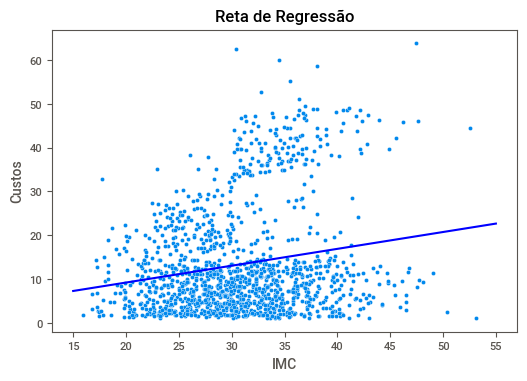

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Note agora o que aconteceria se ajustassemos e avaliassemos o modelo no mesmo conjunto de dados (nesse caso, os dados todos).

In [ ]:
reg0 = LinearRegression()
reg0.fit(X, y)

preditos = reg0.predict(X)

eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.78
